In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

JAK_INHIBITORS = False

data_dir = "../data/11172025_IF_scan"
if_data_files = ["Cell.csv"]

columns = ["WellId", "CircTotalIntenCh2", "CircTotalIntenCh3"]

column_to_stain = dict(zip(range(1,13), ["pSTAT"]*6 + ["tSTAT"] * 6))
column_to_stain = dict(zip(range(1,13), ["pSTAT"]*12))
#column_to_stain = dict(zip(range(1,13), ["Old"]*3 + ["New"]*9))

row_to_t_pts = {
	"A":0,
	"B":15,
	"C":20,
	"D":25,
	"E":40,
	"F":60,
	#"G":60,
	#"H":90
}	

column_to_patient = {
	1:626,
	2:626,
	3:813,
	4:813,
	5:813,
	#6:904,
	#7:904,
	#8:905,
	#9:905,
	#10:905,
	#11:905,
	#12:905
}

row_to_replicate = {
	"A":1,
	"B":2,
	"C":1,
	"D":2,
	"E":3,
	"F":1,
	#"G":2,
	#"H":1    
}

column_to_replicate = {
	1:1,
	2:2,
	3:1,
	4:2,
	5:3,
	#6:1,
	#7:2,
	#8:1,
	#9:2,
	#10:1,
	#11:2,
	#2:3
}


In [3]:
dfs = []
for fname in if_data_files:
	full_fname = f"{data_dir}/{fname}"
	df = pd.read_csv(full_fname, usecols=columns)

	stat1_means = df.groupby("WellId")["CircTotalIntenCh2"].mean()
	stat1_sems = df.groupby("WellId")["CircTotalIntenCh2"].std()
	stat3_means = df.groupby("WellId")["CircTotalIntenCh3"].mean()
	stat3_sems = df.groupby("WellId")["CircTotalIntenCh3"].std()

	stat_df = pd.concat([stat1_means, stat1_sems, stat3_means, stat3_sems], axis=1)
	stat_df.columns = ["STAT1 Mean", "STAT1 SEM", "STAT3 Mean", "STAT3 SEM"]
	stat_df.index = [x.strip() for x in stat_df.index]
	# Assign various characteristics based on wells using the dictionaries above
	rows = [x.strip()[0] for x in stat_df.index.values]
	cols = [int(x.strip()[1:]) for x in stat_df.index.values]
	stat_df["STAT"] = [column_to_stain[x] for x in cols]
	stat_df["PatientId"] = [column_to_patient[x] for x in cols]
	stat_df["IL-6 Concentration"] = ["10 ng/mL" for x in cols]
	stat_df["Time"] = [row_to_t_pts[x] for x in rows]
	stat_df["Replicate"] = [column_to_replicate[x] for x in cols]
	stat_df["Date"] = data_dir.split("/")[-1]
 
	# REPLACE INFORMATION FOR SPECIAL WELLS THAT DO NOT MATCH DICTIONARY INFO ABOVE
	stat_df.loc["E01", "Time"] = 60
 
	display(stat_df)
	stat_df.to_csv(f"{data_dir.split('/')[-1]}.csv")
	dfs.append(stat_df)
 
patient_to_marker = {
	617:"s",
	626:"*",
	813:"v",
	826:"X",
	904:"P",
	905:"o"
}


,STAT1 Mean,STAT1 SEM,STAT3 Mean,STAT3 SEM,STAT,PatientId,IL-6 Concentration,Time,Replicate,Date
A01,2.283930e+06,1.351961e+06,8.813845e+05,1.083523e+06,pSTAT,626,10 ng/mL,0,1,11172025_IF_scan
A02,2.392465e+06,1.797960e+06,1.151671e+06,6.301831e+05,pSTAT,626,10 ng/mL,0,2,11172025_IF_scan
A03,2.409026e+06,1.024413e+06,1.361491e+06,2.044746e+06,pSTAT,813,10 ng/mL,0,1,11172025_IF_scan
A04,2.386430e+06,1.092782e+06,1.134290e+06,5.917621e+05,pSTAT,813,10 ng/mL,0,2,11172025_IF_scan
A05,2.481980e+06,1.374628e+06,1.269641e+06,6.097335e+05,pSTAT,813,10 ng/mL,0,3,11172025_IF_scan
B01,5.038907e+06,2.970404e+06,6.268010e+06,3.437607e+06,pSTAT,626,10 ng/mL,15,1,11172025_IF_scan
B02,4.669364e+06,2.958606e+06,5.909857e+06,3.846499e+06,pSTAT,626,10 ng/mL,15,2,11172025_IF_scan
B03,6.464125e+06,4.142964e+06,5.114809e+06,2.970939e+06,pSTAT,813,10 ng/mL,15,1,11172025_IF_scan
B04,6.723477e+06,4.435466e+06,5.457162e+06,3.835328e+06,pSTAT,813,10 ng/mL,15,2,11172025_IF_scan
B05,6.714103e+06,4.740778e+06,5.399694e+06,3.569542e+06,pSTAT,813,10 ng/mL,15,3,11172025_IF_scan


(2,)


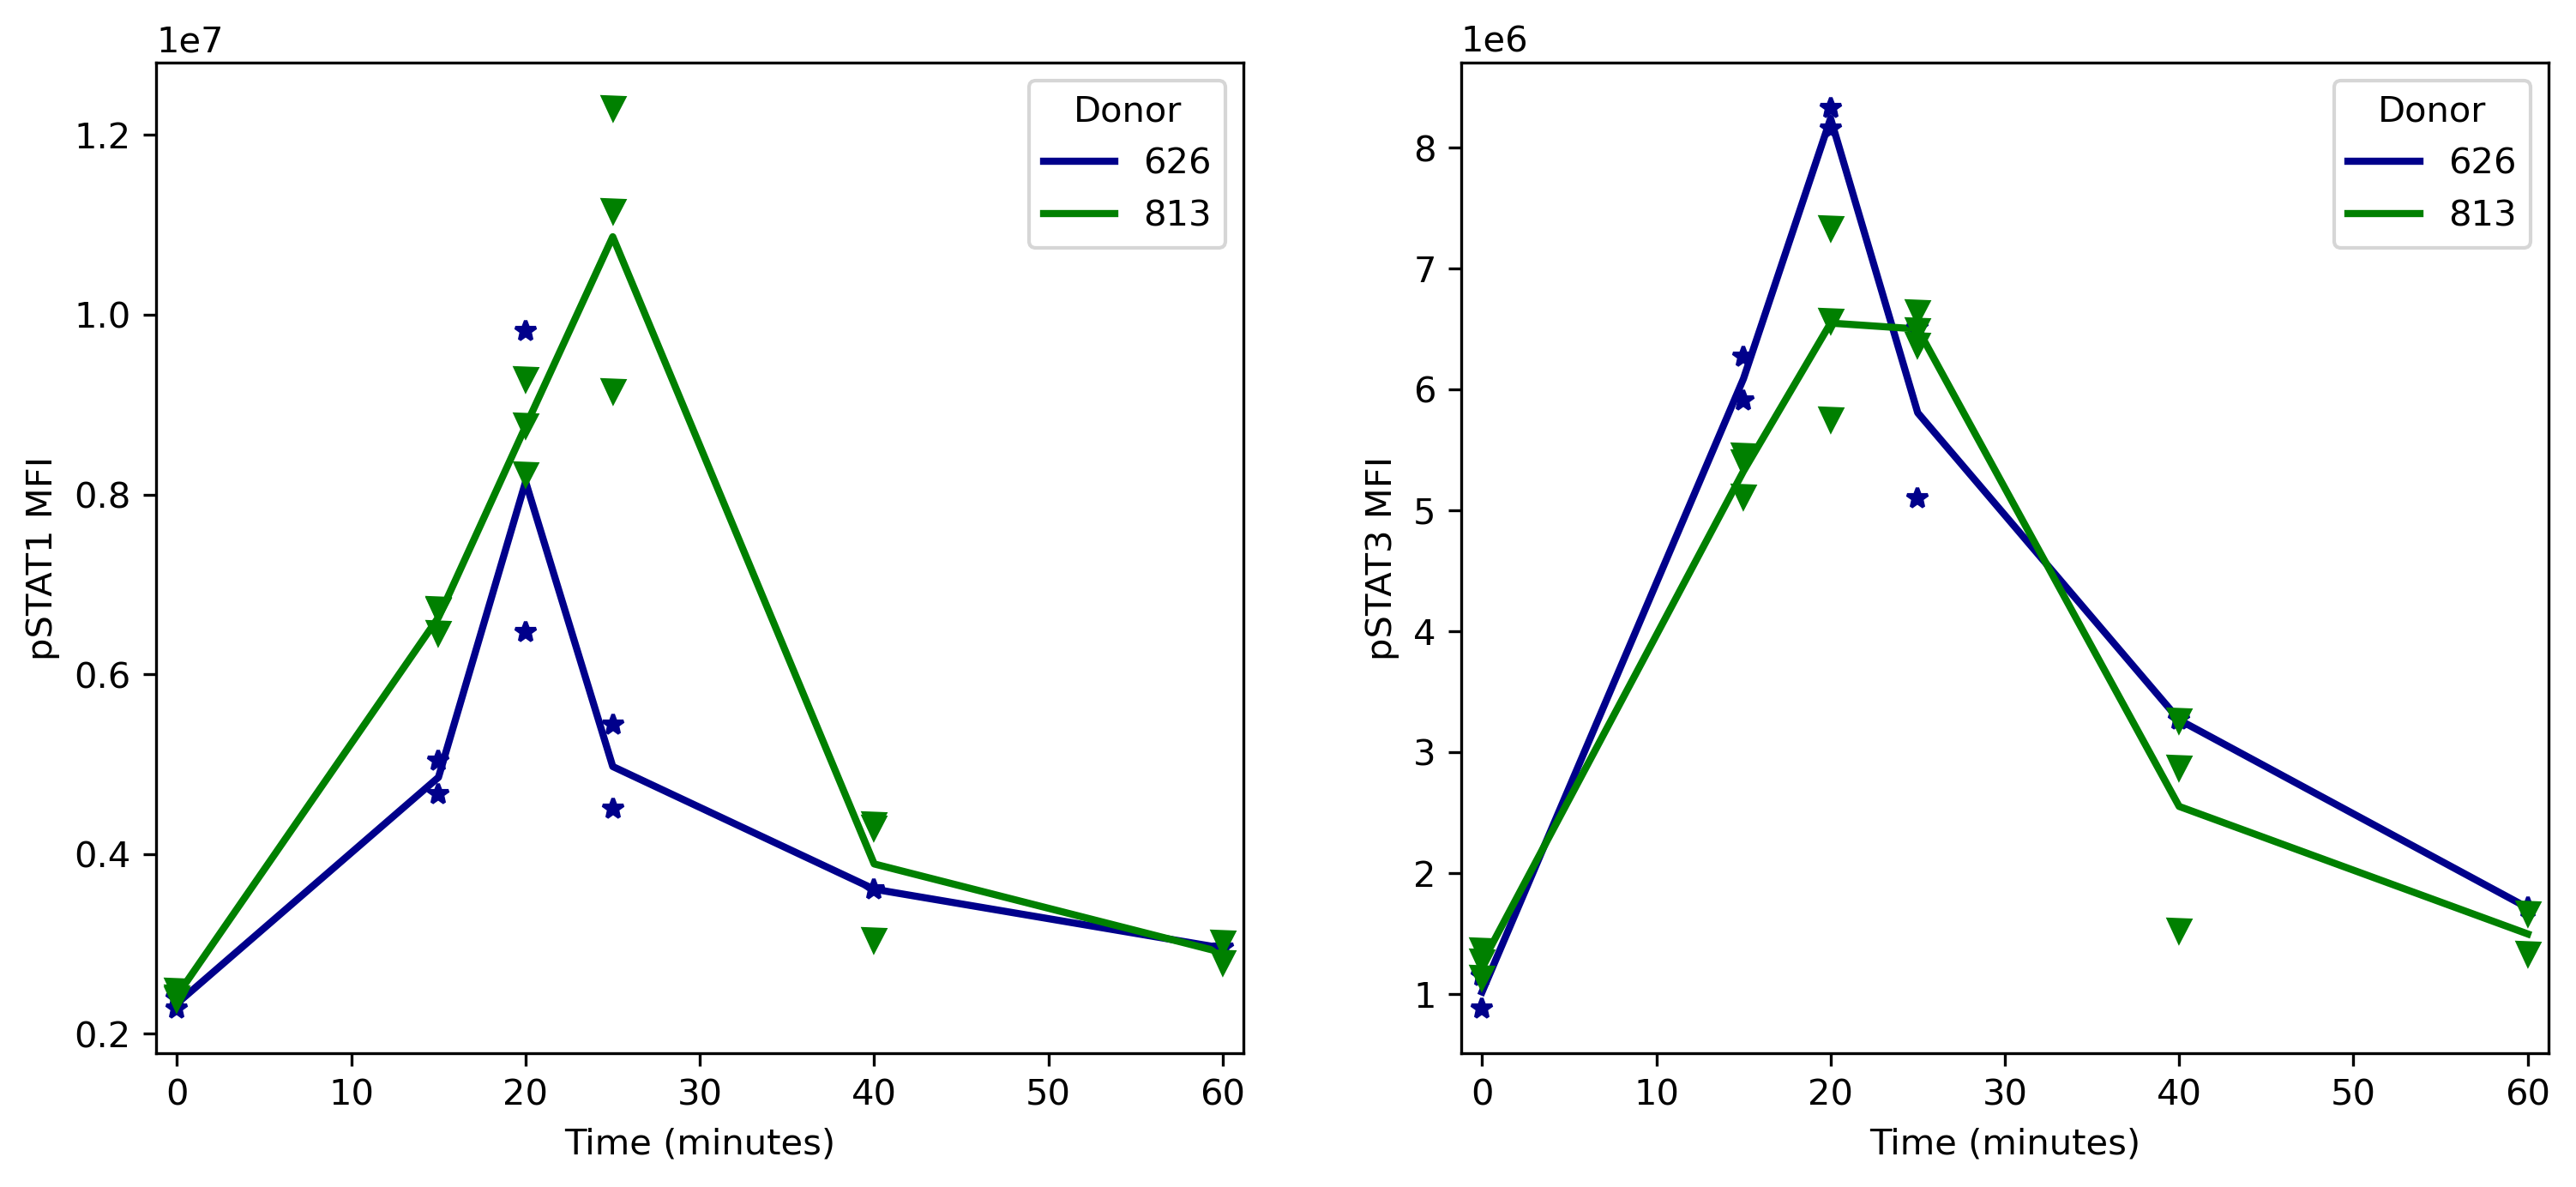

In [4]:
import random

def generate_random_colors(n):
	"""
	Generates a list of n random RGB color tuples.
	Each color is represented as a tuple (r, g, b) where r, g, and b are
	integers between 0 and 255 (inclusive).
	"""
	colors = []
	for _ in range(n):
		r = random.randint(0, 255)/255.0
		g = random.randint(0, 255)/255.0
		b = random.randint(0, 255)/255.0
		colors.append((r, g, b))
	return colors

patient_to_marker = {
	617:"s",
	626:"*",
	813:"v",
	826:"x",
	904:"P",
	905:"o"
}


patient_to_color = {
	617: "r",
	626: "darkblue",
	813: "g",
	826: "orange",
	904: "purple",
	905: "deepskyblue"
}

df = dfs[0]
ms = 6 # markersize
fig1, axs = plt.subplots(1,2, figsize=(12,5), dpi=300)
print(axs.shape)
df["STAT1 SEM"] = [0] * len(df)
df["STAT3 SEM"] = [0] * len(df)
# Select tSTAT measurement

for pat in df["PatientId"].unique():
	if pat == 8260:# or pat == 905:
		continue;
	# Plot tSTATs from first scan
	stat1_ax = axs[0]
	stat3_ax = axs[1]
 
	cur_df = df.loc[df["PatientId"] == pat]

	#stat1_ax.plot(cur_df["Time"].unique(), cur_df.groupby("Time")["STAT1 Mean"].mean(),
	#				marker="none", color=patient_to_color[pat], 
	# 				lw=2, label=f"{pat}")#) Average")
	sns.lineplot(x="Time", y="STAT1 Mean", data=cur_df,	color=patient_to_color[pat], 
	 				lw=2, label=f"{pat}", ax=stat1_ax, errorbar=None)
	sns.lineplot(x="Time", y="STAT3 Mean", data=cur_df,	color=patient_to_color[pat], 
	 				lw=2, label=f"{pat}", ax=stat3_ax, errorbar=None)
 
	#for il6 in df["IL-6 Concentration"].unique():
	for rep in df["Replicate"].unique():
		select_df = df.loc[(df["PatientId"] == pat) & (df["Replicate"]== rep)]
		#if 0 == 0:
		#	continue; 
		if select_df.empty:
			continue
		stat1_ax.errorbar(x=select_df["Time"], y=select_df["STAT1 Mean"], yerr=select_df["STAT1 SEM"],
					marker=patient_to_marker[pat], ms=ms, color=patient_to_color[pat],
					ls="none",)
#	 				lw=0.75, label=f"{pat} - {rep}", capsize=2)
		
		stat3_ax.errorbar(x=select_df["Time"], y=select_df["STAT3 Mean"], yerr=select_df["STAT3 SEM"],
					marker=patient_to_marker[pat], ms=ms, color=patient_to_color[pat],
					ls="none",) 
	 				#lw=0.75,  label=f"{pat} - {rep}", capsize=2)
	stat1_ax.set_ylabel("pSTAT1 MFI")
	stat1_ax.margins(x=0.02)
	stat3_ax.margins(x=0.02);
	stat1_ax.set_xlabel("Time (minutes)")
	stat1_ax.legend(title="Donor")
	#stat1_ax.set_title("Fedratinib")
	stat3_ax.set_ylabel("pSTAT3 MFI")
	stat3_ax.set_xlabel("Time (minutes)")
	stat3_ax.legend(title="Donor")
	#stat3_ax.set_title("Fedratinib")
	#stat1_ax.set_xlim(right=62)
	#stat3_ax.set_xlim(right=62)